## Stock Price Predictor

In [1]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
stock = input('Enter the code of the Stock: ')
data = yf.download(stock, "2008-01-01", "2021-11-27", auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,843.200012,843.200012,843.200012,834.900024,4
2008-01-02,848.700012,857.799988,846.400024,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,4


In [5]:
data.shape

(3501, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3501 entries, 2007-12-31 to 2021-11-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3501 non-null   float64
 1   High    3501 non-null   float64
 2   Low     3501 non-null   float64
 3   Close   3501 non-null   float64
 4   Volume  3501 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 164.1 KB


In [8]:
data.describe()

,Open,High,Low,Close,Volume
count,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000
mean,1346.093431,1353.284119,1338.217281,1345.850871,5577.000286
std,279.904981,281.122225,278.552880,279.944893,29425.377313
min,705.000000,715.500000,681.000000,704.900024,0.000000
25%,1192.599976,1197.900024,1186.099976,1193.000000,42.000000
50%,1292.099976,1296.300049,1286.699951,1292.500000,140.000000
75%,1569.300049,1577.500000,1558.300049,1567.400024,457.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,386334.000000


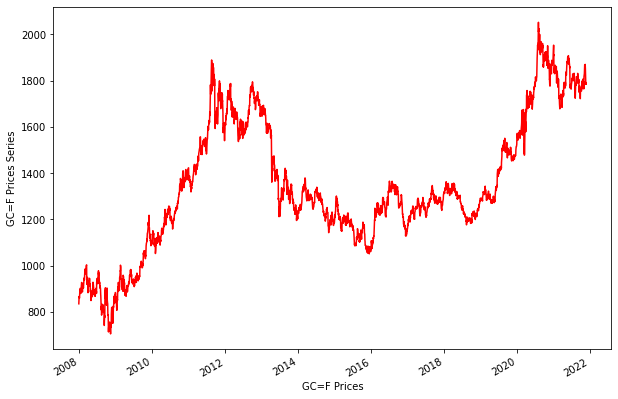

In [9]:
data.Close.plot(figsize=(10,7), color='r')
plt.xlabel(f"{stock} Prices")
plt.ylabel(f"{stock} Prices Series")
plt.show()

<AxesSubplot:xlabel='Open', ylabel='Density'>

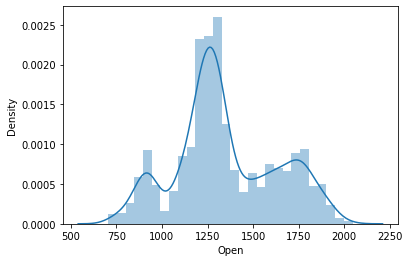

In [10]:
sns.distplot(data.Open)

<AxesSubplot:xlabel='High', ylabel='Density'>

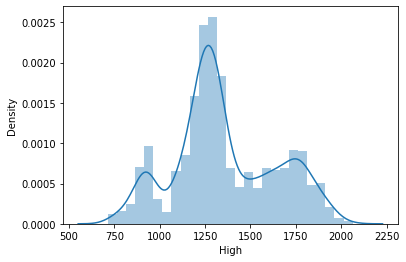

In [11]:
sns.distplot(data.High)

<AxesSubplot:xlabel='Low', ylabel='Density'>

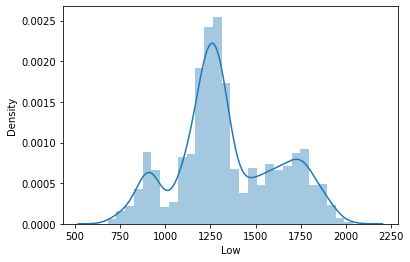

In [12]:
sns.distplot(data.Low)

<AxesSubplot:xlabel='Close', ylabel='Density'>

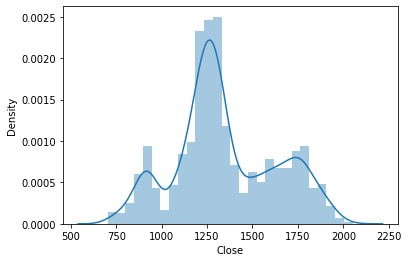

In [13]:
sns.distplot(data.Close)

### Conlusions
- Shape the of the data
- How our data is distributed
- It's is very very non-linear 

In [15]:
X = data.drop('Close', axis = 1)
y = data['Close']

## Training and Testing Dataset

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [17]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(2800, 4) (701, 4) (2800,) (701,)


## Modeling Part

In [18]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)

In [19]:
# Predict value print
pred

array([1681.75095251,  902.41536579, 1283.96311199, 1293.66212428,
       1268.60803071, 1270.35435153, 1277.52227286, 1221.09791399,
       1196.76380802, 1779.54929814, 1721.48843551,  740.29241436,
       1674.51540155,  978.64468957, 1197.41160432,  925.45610584,
       1884.84233119, 1333.1044081 , 1638.8004372 , 1080.15970153,
        942.41253267, 1302.1040397 , 1855.41875876, 1132.5698276 ,
       1411.99841385,  838.07689447, 1206.2259597 , 1497.22461786,
       1328.63048394, 1759.09211222, 1188.29092937, 1381.54175619,
       1265.66405139, 1359.69547545, 1823.97918146,  786.15848141,
       1105.59226302, 1234.10599141, 1266.23915772, 1283.5924742 ,
       1308.68573032, 1298.75795658,  892.44613576, 1501.3294342 ,
        956.35468615, 1726.4564187 , 1103.41961523, 1253.57858029,
       1155.96904623, 1272.27607217, 1884.58418145, 1315.97233004,
       1221.28234296, 1274.3748234 , 1650.45036801, 1694.23437298,
       1280.75984317, 1387.20777894, 1268.83056156, 1170.65122

In [16]:
# MSE (Mean Square Error)
# RMSE (Root Mean Square Error)
# r2_square --> 1.0 -> Very Good Model

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    '''
        y_test: ground truth
        y_pred: model predict value
    '''
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test, y_pred)
    print('*'*50)
    print(f"*  Mean Square Error: {mse}")
    print(f"*  Root Mean Square Error: {rmse}")
    print(f"*  r2_score: {r2_scores}")
    print('*'*50)

calculate_metrics(y_test, pred)

**************************************************
*  Mean Square Error: 30.603609421197696
*  Root Mean Square Error: 5.532052912002713
*  r2_score: 0.9996200981240283
**************************************************


### Lasso and Ridge Model

In [17]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso().fit(X_train, y_train)
model_ridge = Ridge().fit(X_train, y_train)

model_lasso_pred = model_lasso.predict(X_test)
model_ridge_pred = model_ridge.predict(X_test)

In [18]:
calculate_metrics(y_test, model_lasso_pred)

calculate_metrics(y_test, model_ridge_pred)

**************************************************
*  Mean Square Error: 60.07663515535179
*  Root Mean Square Error: 7.750911891858389
*  r2_score: 0.9992542308953343
**************************************************
**************************************************
*  Mean Square Error: 30.603630749258734
*  Root Mean Square Error: 5.532054839682877
*  r2_score: 0.9996200978592696
**************************************************


## Support Vector Machine Regression

In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

params_grid = GridSearchCV(SVR(), params, refit=True, verbose=3)
params_grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.056 total time=   3.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.040 total time=   4.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.020 total time=   4.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.018 total time=   4.9s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.051 total time=   5.8s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.056 total time=   4.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.040 total time=   5.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.020 total time=   3.8s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.018 total time=   5.8s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.051 total time=   4.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.056 total time=   3.9s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [20]:
model_svr = SVR(C=10, gamma=0.1, kernel='rbf')
model_svr.fit(X_train, y_train)
svr_pred = model_svr.predict(X_test)

## Model Save

In [25]:
import joblib  

joblib.dump(model_ridge, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")